In [2]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Create polygons
p1 = Polygon([(0, 0), (0, 1), (0.5, 0.5)])
p2 = Polygon([(0.75, 0), (1, 0.5), (0.75, 1), (1.75, 0)])
p3 = Polygon([(2, 0), (2, 1), (3, 0)])
polygons = gpd.GeoDataFrame([p1, p2, p3], columns={"geometry"})
polygons["name"] = ["a", "b", "c"]

# Create red points
redPoints = gpd.GeoDataFrame(
    gpd.points_from_xy(np.random.uniform(0, 3, 50), np.random.uniform(0, 1, 50)),
    columns=["geometry"],
)

<AxesSubplot:>

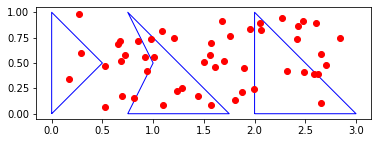

In [3]:
fig, ax = plt.subplots()
polygons.plot(ax=ax, edgecolor="blue", color="none")
redPoints.plot(ax=ax, c="red")

In [4]:
intersect = polygons.sjoin(redPoints)

In [5]:
intersect.groupby(["name"]).size().reset_index(name="counts").rename(columns={"name": "polygon_id"})

,polygon_id,counts
0,a,2
1,b,7
2,c,6
